<a href="https://colab.research.google.com/github/JoseRicardo-dev/dados/blob/main/Projeto_Magalu_CD_Nordeste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Projeto de  Escolha da melhor cidade para CD Magalu no Nordeste

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 1) Dados simulados

data = {
    "Cidade": ["Recife", "Salvador"],
    "Custo_m2": [3200, 2800],               # R$/m² (menor é melhor)
    "Tempo_medio_entrega": [8, 10],         # horas (menor é melhor)
    "Potencial_consumo": [85, 92],          # índice (maior é melhor)
}
df = pd.DataFrame(data)

In [ ]:
display(df)

,Cidade,Custo_m2,Tempo_medio_entrega,Potencial_consumo
0,Recife,3200,8,85
1,Salvador,2800,10,92


In [ ]:

# 2) Função de normalização (Normalizar transforma cada coluna para o intervalo [0, 1], facilitando comparação entre métricas com unidades diferentes.)



def normalizar(coluna, invertido=False):
    """
    Normaliza valores entre 0 e 1.
    Se invertido=True, valores menores são melhores.
    """
    coluna = coluna.astype(float)
    if invertido:
        return 1 - (coluna - coluna.min()) / (coluna.max() - coluna.min())
    return (coluna - coluna.min()) / (coluna.max() - coluna.min())

In [ ]:

# 3) Aplicar normalização

df["Custo_norm"] = normalizar(df["Custo_m2"], invertido=True)
df["Logistica_norm"] = normalizar(df["Tempo_medio_entrega"], invertido=True)
df["Consumo_norm"] = normalizar(df["Potencial_consumo"], invertido=False)

In [ ]:
# 4) Definir cenários de pesos

cenarios = {
    "Logística Prioritária": {"Custo": 0.15, "Logistica": 0.70, "Consumo": 0.15},
    "Consumo+Custo Prioritário": {"Custo": 0.35, "Logistica": 0.10, "Consumo": 0.55},
    "Equilíbrio": {"Custo": 1/3, "Logistica": 1/3, "Consumo": 1/3},
}


In [ ]:
# 5) Calcular scores

resultados = pd.DataFrame({"Cidade": df["Cidade"]})

for nome, pesos in cenarios.items():
    resultados[nome] = (
        df["Custo_norm"] * pesos["Custo"]
        + df["Logistica_norm"] * pesos["Logistica"]
        + df["Consumo_norm"] * pesos["Consumo"]
    )

print("Tabela comparativa de scores:\n")
print(resultados)


Tabela comparativa de scores:

     Cidade  Logística Prioritária  Consumo+Custo Prioritário  Equilíbrio
0    Recife                    0.7                        0.1    0.333333
1  Salvador                    0.3                        0.9    0.666667


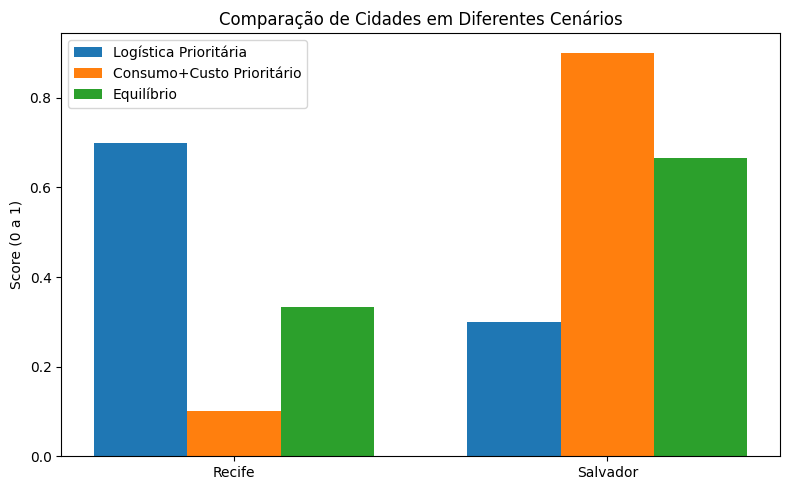

In [ ]:

# 6) Gráfico comparativo

x = np.arange(len(resultados["Cidade"]))
largura = 0.25

fig, ax = plt.subplots(figsize=(8, 5))
for i, nome in enumerate(cenarios.keys()):
    ax.bar(x + i*largura, resultados[nome], largura, label=nome)

ax.set_xticks(x + largura)
ax.set_xticklabels(resultados["Cidade"])
ax.set_ylabel("Score (0 a 1)")
ax.set_title("Comparação de Cidades em Diferentes Cenários")
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Insight Final:

 Insight Final:

Com base na análise multicritério, observamos que:

👉 Se priorizamos logística, Recife apresenta a melhor escolha.
👉 Se priorizamos consumo e custo, Salvador se torna mais vantajosa.
👉 No cenário equilibrado, Salvador ainda mantém leve vantagem.

Portanto, a decisão final não é absoluta: ela depende diretamente da estratégia da Magalu — se o foco será velocidade de entrega (Recife) ou expansão de mercado consumidor com custo mais competitivo (Salavador).